In [1]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd

#Numpy
import numpy as np

#wordcloud 
from wordcloud import WordCloud

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

#Violin Plot
import plotly.express as px

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

import scipy.stats as stats

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score 

# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

PART1: EXPORATORY DATA ANALYSIS (EDA)

In [2]:
# READ IN THE DATA USING PANDAS 
df = pd.read_csv('top10s.csv')
# DISPLAY THE FIRST 5 ROWS
df.head()

Unnamed: 0                 title      artist        top genre  year  bpm  \
0           1      Hey, Soul Sister       Train       neo mellow  2010   97   
1           2  Love The Way You Lie      Eminem  detroit hip hop  2010   87   
2           3               TiK ToK       Kesha        dance pop  2010  120   
3           4           Bad Romance   Lady Gaga        dance pop  2010  119   
4           5  Just the Way You Are  Bruno Mars              pop  2010  109   

   nrgy  dnce  dB  live  val  dur  acous  spch  pop  
0    89    67  -4     8   80  217     19     4   83  
1    93    75  -5    52   64  263     24    23   82  
2    84    76  -3    29   71  200     10    14   80  
3    92    70  -4     8   71  295      0     4   79  
4    84    64  -5     9   43  221      2     4   78

In [3]:
#dropping the unnamaed column
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

df.head()

title      artist        top genre  year  bpm  nrgy  dnce  \
0      Hey, Soul Sister       Train       neo mellow  2010   97    89    67   
1  Love The Way You Lie      Eminem  detroit hip hop  2010   87    93    75   
2               TiK ToK       Kesha        dance pop  2010  120    84    76   
3           Bad Romance   Lady Gaga        dance pop  2010  119    92    70   
4  Just the Way You Are  Bruno Mars              pop  2010  109    84    64   

   dB  live  val  dur  acous  spch  pop  
0  -4     8   80  217     19     4   83  
1  -5    52   64  263     24    23   82  
2  -3    29   71  200     10    14   80  
3  -4     8   71  295      0     4   79  
4  -5     9   43  221      2     4   78

In [4]:
#check for nulls
df.isnull().sum()

title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

In [5]:
#check for duplicates 
df.duplicated().sum()

0

In [6]:
#check the dimension 
df.shape

(603, 14)

In [7]:
#making the variable names more readable
df.rename(columns={'title':'song', 'artist':'artist', 'top genre':'genre', 'year':'year', 'bpm':'beats_per_minute','nrgy':'energy',
                    'dnce':'danceability','dB':'loudness','live':'liveness', 'val':'valence', 'dur':'length', 'acous':'acousticness',
                    'spch':'speechiness','pop':'popularity'}, inplace=True)

In [8]:
df.head()

song      artist            genre  year  beats_per_minute  \
0      Hey, Soul Sister       Train       neo mellow  2010                97   
1  Love The Way You Lie      Eminem  detroit hip hop  2010                87   
2               TiK ToK       Kesha        dance pop  2010               120   
3           Bad Romance   Lady Gaga        dance pop  2010               119   
4  Just the Way You Are  Bruno Mars              pop  2010               109   

   energy  danceability  loudness  liveness  valence  length  acousticness  \
0      89            67        -4         8       80     217            19   
1      93            75        -5        52       64     263            24   
2      84            76        -3        29       71     200            10   
3      92            70        -4         8       71     295             0   
4      84            64        -5         9       43     221             2   

   speechiness  popularity  
0            4          83  
1           23          82  
2           14          80  
3            4          79  
4            4          78

In [9]:
df.describe()

year  beats_per_minute      energy  danceability    loudness  \
count   603.000000        603.000000  603.000000    603.000000  603.000000   
mean   2014.592040        118.545605   70.504146     64.379768   -5.578773   
std       2.607057         24.795358   16.310664     13.378718    2.798020   
min    2010.000000          0.000000    0.000000      0.000000  -60.000000   
25%    2013.000000        100.000000   61.000000     57.000000   -6.000000   
50%    2015.000000        120.000000   74.000000     66.000000   -5.000000   
75%    2017.000000        129.000000   82.000000     73.000000   -4.000000   
max    2019.000000        206.000000   98.000000     97.000000   -2.000000   

         liveness     valence      length  acousticness  speechiness  \
count  603.000000  603.000000  603.000000    603.000000   603.000000   
mean    17.774461   52.225539  224.674959     14.326700     8.358209   
std     13.102543   22.513020   34.130059     20.766165     7.483162   
min      0.000000    0.000000  134.000000      0.000000     0.000000   
25%      9.000000   35.000000  202.000000      2.000000     4.000000   
50%     12.000000   52.000000  221.000000      6.000000     5.000000   
75%     24.000000   69.000000  239.500000     17.000000     9.000000   
max     74.000000   98.000000  424.000000     99.000000    48.000000   

       popularity  
count  603.000000  
mean    66.520730  
std     14.517746  
min      0.000000  
25%     60.000000  
50%     69.000000  
75%     76.000000  
max     99.000000

In [10]:
df['genre'].nunique()

50

In [11]:
df['genre'].value_counts().head(10)

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
Name: genre, dtype: int64

Text(0.5, 1.0, 'Top 10 genre in percentage')

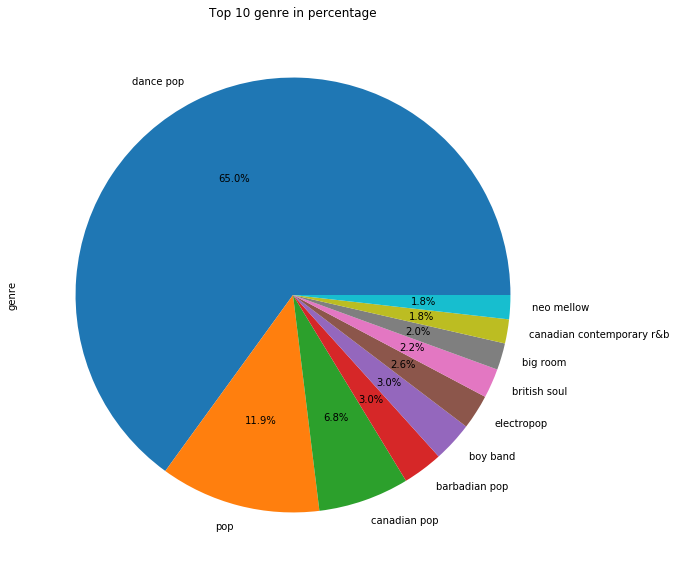

In [12]:
df['genre'].value_counts().head(10).plot.pie(figsize=(10,10),autopct='%1.1f%%')
plt.title('Top 10 genre in percentage')

Insights: There are 50 unique genres in the top spotify songs from 2010-19. 
Clearly dance-pop is the top genre on Spotify during this period.

In [13]:
df['artist'].nunique()

184

In [14]:
df['artist'].value_counts().head(10)

Katy Perry          17
Justin Bieber       16
Maroon 5            15
Rihanna             15
Lady Gaga           14
Bruno Mars          13
The Chainsmokers    11
Pitbull             11
Ed Sheeran          11
Shawn Mendes        11
Name: artist, dtype: int64

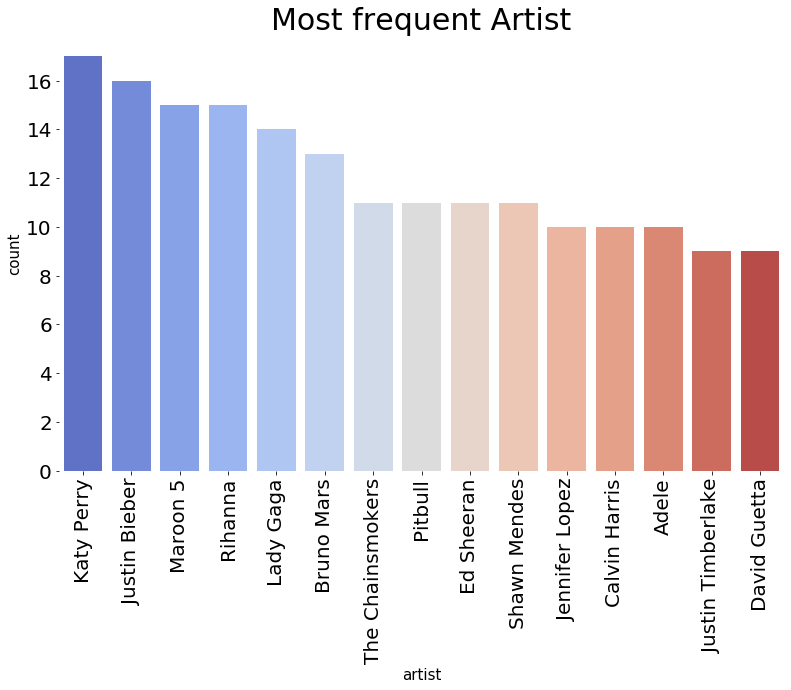

In [15]:
#And who's the most frequent artists ? 
plt.figure(figsize=(13,8))
plt.title('Most frequent Artist',fontsize=30)
plt.xlabel('Artist', fontsize=15)
plt.ylabel('Count', fontsize=15)

sns.countplot(df.artist,order=pd.value_counts(df.artist).iloc[:15].index,palette=sns.color_palette("coolwarm", 15))

plt.xticks(size=20,rotation=90)
plt.yticks(size=20)
sns.despine(bottom=True, left=True)
plt.show()

Insights: There are 184 unique artists whose songs reached top in the charts on Spotify in the timeperiod of 2010-19.
Katy Perry has most number of top songs on Spotify in the period of 2010-19 followed by Justin Bieber .

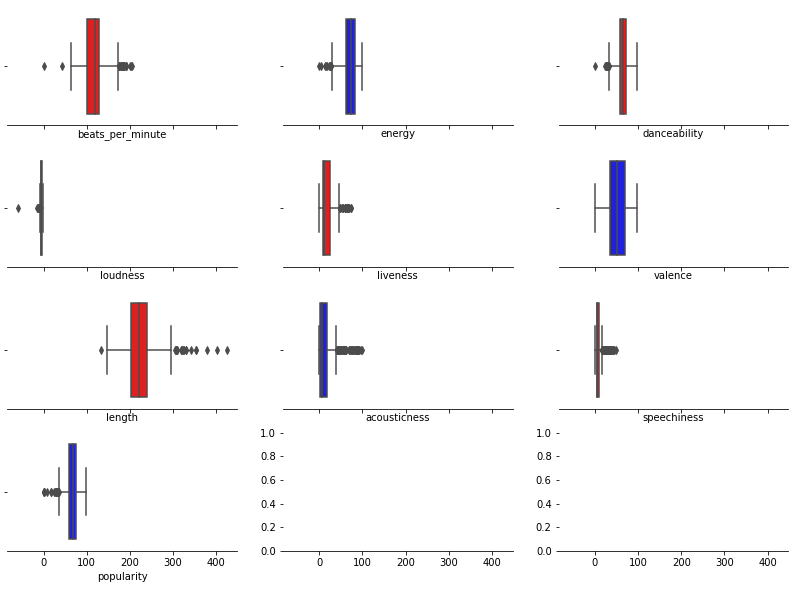

In [16]:
# boxplots
f, axes = plt.subplots(4, 3, figsize=(14, 10), sharex=True)
sns.despine(left=True)
sns.boxplot(df.beats_per_minute, color="r", ax=axes[0, 0])
sns.boxplot(df.energy,color="b", ax=axes[0, 1])
sns.boxplot(df.danceability, color="r", ax=axes[0, 2])
sns.boxplot(df.loudness, color="b", ax=axes[1, 0])
sns.boxplot(df.liveness, color="r", ax=axes[1, 1])
sns.boxplot(df.valence, color="b", ax=axes[1, 2])
sns.boxplot(df.length, color="r", ax=axes[2, 0])
sns.boxplot(df.acousticness, color="b", ax=axes[2, 1])
sns.boxplot(df.speechiness, color="r", ax=axes[2, 2])
sns.boxplot(df.popularity, color="b", ax=axes[3, 0])

In [17]:
#can we learn something about beats per minute?
df.beats_per_minute.describe()

count    603.000000
mean     118.545605
std       24.795358
min        0.000000
25%      100.000000
50%      120.000000
75%      129.000000
max      206.000000
Name: beats_per_minute, dtype: float64

In [18]:
df[df['beats_per_minute'] > 200] 

song      artist          genre  year  \
200  How Ya Doin'? (feat. Missy Elliott)  Little Mix      dance pop  2013   
276                      FourFiveSeconds     Rihanna  barbadian pop  2015   
362                     L.A.LOVE (la la)      Fergie      dance pop  2015   

     beats_per_minute  energy  danceability  loudness  liveness  valence  \
200               201      95            36        -3        37       51   
276               206      27            58        -6        13       35   
362               202      39            48        -8        26       27   

     length  acousticness  speechiness  popularity  
200     211             9           48          50  
276     188            88            5          80  
362     193             2            9           0

Insights: There are 3 songs that has beats per minute greater than 200! The songs are: How Ya Doin? by Little Mix; FourFiveSeconds by Rihanna; L.A.LOVE (la la) by Fergie.

In [19]:
#beats per minute by top 10 artist & beats for minute per genre 
top_artist = list(df['artist'].value_counts().head(10).index)
top_artist 

['Katy Perry',
 'Justin Bieber',
 'Maroon 5',
 'Rihanna',
 'Lady Gaga',
 'Bruno Mars',
 'The Chainsmokers',
 'Pitbull',
 'Ed Sheeran',
 'Shawn Mendes']

In [20]:
#beats per minute by top 10 artist & beats for minute per genre 
c1 = df.artist.isin(top_artist)
df[c1].beats_per_minute.describe()

count    134.000000
mean     120.492537
std       25.017812
min       65.000000
25%      100.000000
50%      120.000000
75%      128.750000
max      206.000000
Name: beats_per_minute, dtype: float64

This is beats per minute only for the top 10 artist 

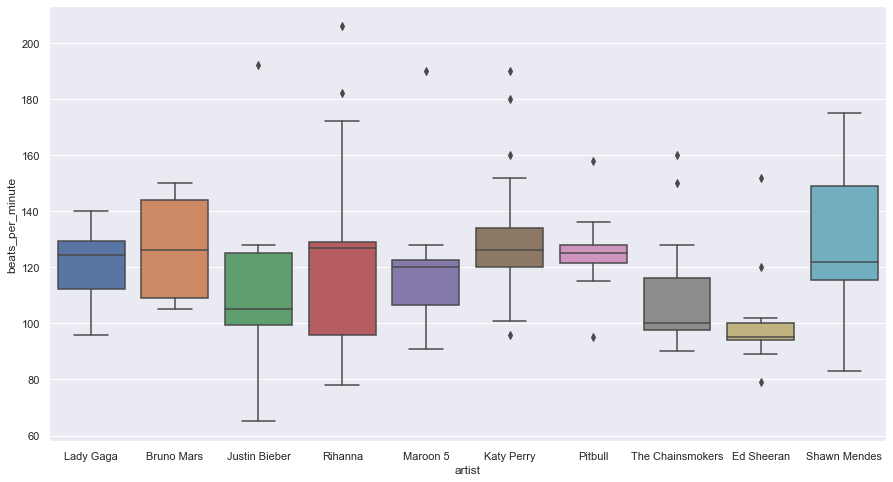

In [21]:
#visualizing beats per minute by top 10 artist 
c1 = df.artist.isin(top_artist)
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.boxplot(x = 'artist', y="beats_per_minute", data= df[c1])

In [22]:
df.groupby('genre')['beats_per_minute'].mean()

genre
acoustic pop                 155.000000
alaska indie                 132.000000
alternative r&b              136.000000
art pop                      115.125000
atl hip hop                  102.800000
australian dance             128.833333
australian hip hop            95.000000
australian pop               153.800000
barbadian pop                125.333333
baroque pop                  146.000000
belgian edm                  122.000000
big room                     122.300000
boy band                     116.133333
british soul                 116.727273
brostep                      121.000000
canadian contemporary r&b    127.000000
canadian hip hop             109.000000
canadian latin                98.000000
canadian pop                 121.500000
candy pop                    109.000000
celtic rock                   85.000000
chicago rap                  125.000000
colombian pop                126.000000
complextro                   120.333333
contemporary country          86.0

This is beats per minute per Genre 

In [23]:
genre_beats = df.groupby('genre').agg({'beats_per_minute': 'mean', 'genre':'count'}).rename(columns = {'genre': 'count'})
c1 = genre_beats['count'] >= 9
genre_beats[c1].sort_values(by = 'count', ascending = False)



beats_per_minute  count
genre                                             
dance pop                        118.486239    327
pop                              117.066667     60
canadian pop                     121.500000     34
barbadian pop                    125.333333     15
boy band                         116.133333     15
electropop                       112.846154     13
british soul                     116.727273     11
big room                         122.300000     10
canadian contemporary r&b        127.000000      9
neo mellow                       109.111111      9

Beats per minute by genre (top 10 genres)

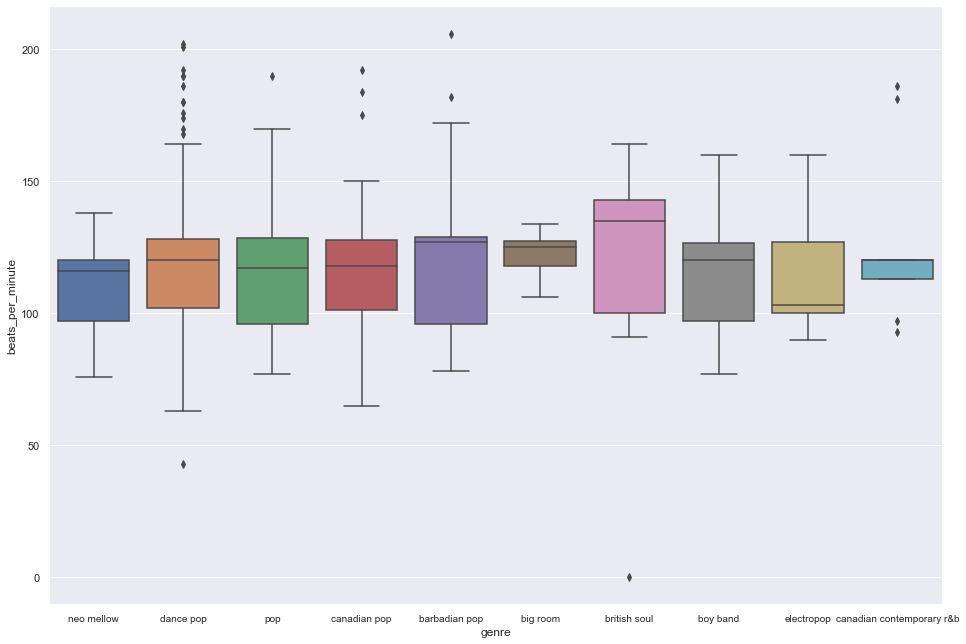

In [24]:
#visualizing beats per minute by top 10 artist 
genre_beats = df.groupby('genre').agg({'beats_per_minute': 'mean', 'genre':'count'}).rename(columns = {'genre': 'count'})
c1 = genre_beats['count'] >= 9
#genre_beats[c1].sort_values(by = 'count', ascending = False)
top10genres = list(genre_beats[c1].index)
c2 = df.genre.isin(top10genres)
sns.set(rc={'figure.figsize':(16,11)})
ax = sns.boxplot(x = 'genre', y="beats_per_minute", data= df[c2])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10);

In [25]:
df.groupby('year')['length'].mean()

year
2010    229.803922
2011    242.566038
2012    224.400000
2013    234.492958
2014    224.155172
2015    223.368421
2016    220.225000
2017    222.169231
2018    217.187500
2019    200.645161
Name: length, dtype: float64

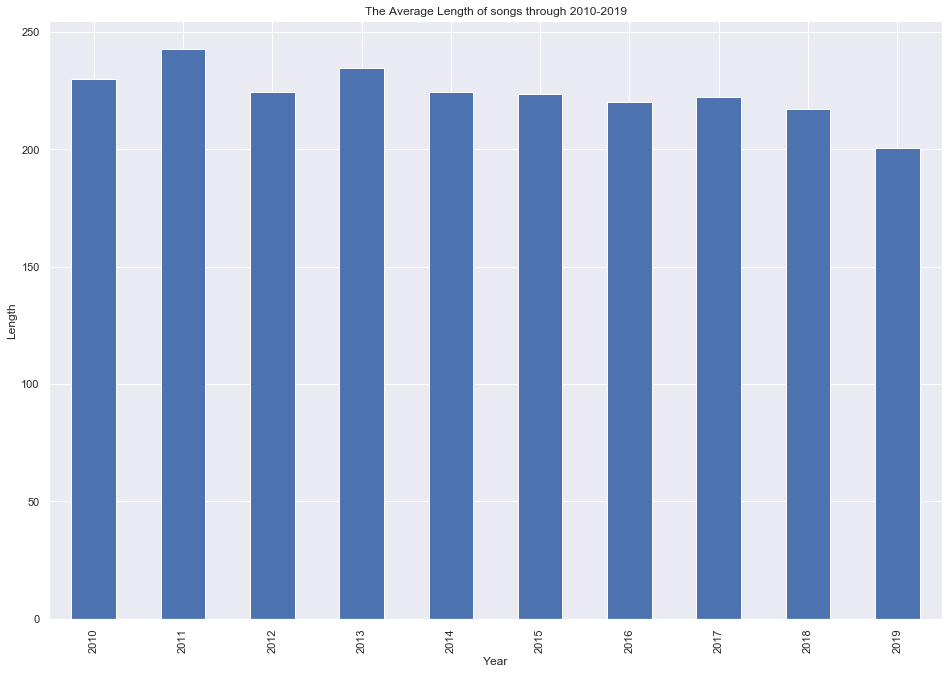

In [26]:
gb = df.groupby('year')['length'].mean()
gb.plot(kind='bar');
plt.title('The Average Length of songs through 2010-2019')
plt.xlabel('Year')
plt.ylabel('Length')
plt.show()

Insights: The average length of songs through 2010-19 is about 3.5 minutes. The average length of songs is slightly higher in 2011.

In [27]:
#visualizing danceability 
fig = px.violin(df, y="danceability", color="year", points='all', hover_name='song', hover_data=['artist'])
fig.show()


Insights:
The song Drip by CardiB released in 2018 has the highest danceability followed by  Anaconda by Nicki Minaj in 2014      
The song Bad Liar by Imagine Dragon has the same danceability as Drip, thus there are two songs with highest danceablity. 

The song Million Years Ago by Adele has zero danceability. quite obvious 😂 

In [28]:
fig = px.violin(df, y="popularity", color="year", points='all', hover_name='song', hover_data=['artist'])
fig.show()

Insights: It is very clear that Memories by Maroon5 is the most popular song during the period of 2010-19. 

In [29]:
fig = px.scatter(df, x="popularity", y="speechiness", color='year', hover_name='song', hover_data=['artist','year'])
fig.show()

Insights:
The most popular songs contain less spoken words
The songs with most spoken words is"How ya doin'?" by Little Mix feauturing Missy Elliot.

In [30]:
#who's the most popular artists in 2019? 
fig = px.scatter(df.query("year==2019"), y="popularity", x="artist", hover_name='song', color='popularity') 
fig.show()

Insights: Maroon 5 is clearly the most popular artist with their songs: 'Memories' and 'Girls like you'. 
Ed Sheeran has top 5 songs in 2019 

In [31]:
#take a look at the dance pop songs 
df[df['genre'].str.contains('dance pop')]

song         artist  \
2                                              TiK ToK          Kesha   
3                                          Bad Romance      Lady Gaga   
6                                             Dynamite      Taio Cruz   
7                                              Secrets    OneRepublic   
10           Club Can't Handle Me (feat. David Guetta)       Flo Rida   
..                                                 ...            ...   
589                        Giant (with Rag'n'Bone Man)  Calvin Harris   
594                          No Guidance (feat. Drake)    Chris Brown   
598                Find U Again (feat. Camila Cabello)    Mark Ronson   
600  No Brainer (feat. Justin Bieber, Chance the Ra...      DJ Khaled   
601    Nothing Breaks Like a Heart (feat. Miley Cyrus)    Mark Ronson   

         genre  year  beats_per_minute  energy  danceability  loudness  \
2    dance pop  2010               120      84            76        -3   
3    dance pop  2010               119      92            70        -4   
6    dance pop  2010               120      78            75        -4   
7    dance pop  2010               148      76            52        -6   
10   dance pop  2010               128      87            62        -4   
..         ...   ...               ...     ...           ...       ...   
589  dance pop  2019               122      89            81        -4   
594  dance pop  2019                93      45            70        -7   
598  dance pop  2019               104      66            61        -7   
600  dance pop  2019               136      76            53        -5   
601  dance pop  2019               114      79            60        -6   

     liveness  valence  length  acousticness  speechiness  popularity  
2          29       71     200            10           14          80  
3           8       71     295             0            4          79  
6           4       82     203             0            9          77  
7          12       38     225             7            4          77  
10          6       47     235             3            3          73  
..        ...      ...     ...           ...          ...         ...  
589         8       61     229             2            4          84  
594        16       14     261            12           15          81  
598        20       16     176             1            3          75  
600         9       65     260             7           34          70  
601        42       24     217             1            7          69  

[327 rows x 14 columns]

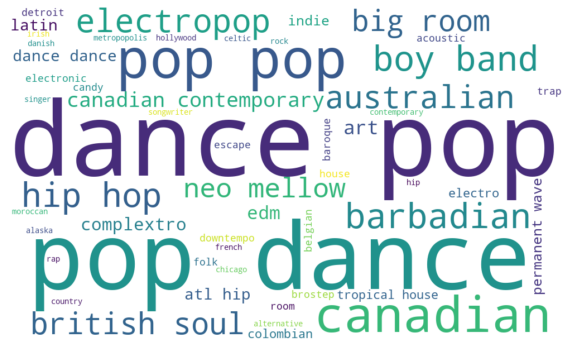

In [32]:
#Let's make a word cloud ? just for the fun of it 
wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 200, max_words = 150,
                      background_color='white').generate(" ".join(df.genre))

plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Dance Pop definitely pops out at you 😂 

In [33]:
#what's the most popuar dance pop song on Spotify during 2010-19 ?
fig = px.scatter(df[df['genre'].str.contains('dance pop')], x="artist", y="popularity", hover_name='song')
fig.show()

The most popular dance pop song on Spotify during 2010-19 was 'Lose You To Love Me' by Selena Gomez 

In [34]:
#Recently I've been listening to a lot of Sam Smith songs. Let's analyze his songs.

ss = df[df['artist']=='Sam Smith']
ss

song     artist genre  year  beats_per_minute  energy  \
211          Stay With Me  Sam Smith   pop  2014                84      42   
269  I'm Not The Only One  Sam Smith   pop  2015                82      49   
576     How Do You Sleep?  Sam Smith   pop  2019               111      68   

     danceability  loudness  liveness  valence  length  acousticness  \
211            42        -6        11       18     173            59   
269            68        -6         8       49     239            53   
576            48        -5         8       35     202            15   

     speechiness  popularity  
211            4          85  
269            4          84  
576            9          93

Insights: The song 'How Do You Sleep' in 2019 is more wordy and popular than the ones released in 2014 and 2015

In [35]:
#Take a look at Justin Bieber ? 
jb = df[df['artist']=='Justin Bieber']
jb

song         artist         genre  year  \
5                            Baby  Justin Bieber  canadian pop  2010   
120             Beauty And A Beat  Justin Bieber  canadian pop  2012   
123                     Boyfriend  Justin Bieber  canadian pop  2012   
182                  Heartbreaker  Justin Bieber  canadian pop  2013   
271                 Love Yourself  Justin Bieber  canadian pop  2015   
275                         Sorry  Justin Bieber  canadian pop  2015   
279             What Do You Mean?  Justin Bieber  canadian pop  2015   
301                       Company  Justin Bieber  canadian pop  2015   
314                 I'll Show You  Justin Bieber  canadian pop  2015   
319                   The Feeling  Justin Bieber  canadian pop  2015   
329  What Do You Mean? - Acoustic  Justin Bieber  canadian pop  2015   
330                 Mark My Words  Justin Bieber  canadian pop  2015   
337                      Been You  Justin Bieber  canadian pop  2015   
364                 Love Yourself  Justin Bieber  canadian pop  2016   
396                       Company  Justin Bieber  canadian pop  2016   
531      Friends (with BloodPop®)  Justin Bieber  canadian pop  2018   

     beats_per_minute  energy  danceability  loudness  liveness  valence  \
5                  65      86            73        -5        11       54   
120               128      84            60        -5         7       53   
123                97      55            72        -6        13       33   
182               105      52            56        -7        34       58   
271               100      38            61       -10        28       52   
275               100      76            65        -4        30       41   
279               125      57            85        -8         8       79   
301                95      80            59        -5         8       43   
314               192      61            36        -7        18        8   
319               127      81            53        -6        10       21   
329               125      36            77       -11        10       76   
330               114      26            38        -9        17       52   
337               113      78            74        -6        32       86   
364               100      38            61       -10        28       52   
396                95      80            59        -5         8       43   
531               105      73            74        -5        30       62   

     length  acousticness  speechiness  popularity  
5       214             4           14          77  
120     228             0            6          72  
123     171             4            5          71  
182     263            14           10          61  
271     234            84           44          83  
275     201             8            5          81  
279     206            59           10          79  
301     208            13            6          72  
314     200             5           10          68  
319     245             8            6          67  
329     204            79            4          64  
330     134            88            3          63  
337     199             2            7          60  
364     234            84           44          83  
396     208            13            6          72  
531     189             0            4          77

Insights: Of course JB released a lot more songs throughout the years than Sam Smith. However, JB's songs are less popular than Sam Smith's songs ! Very Interesting !  

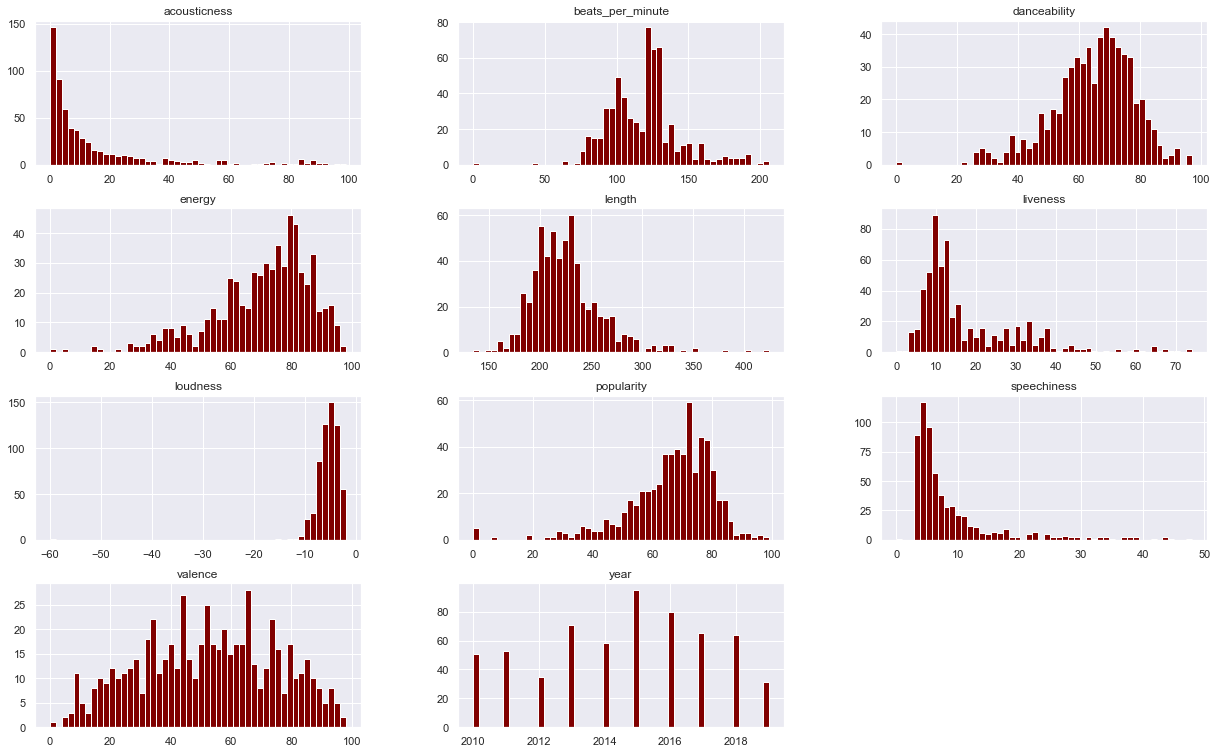

In [36]:
# let's do an inspection using histograms
df.hist(bins = 50, figsize= (21,13), color = 'maroon');

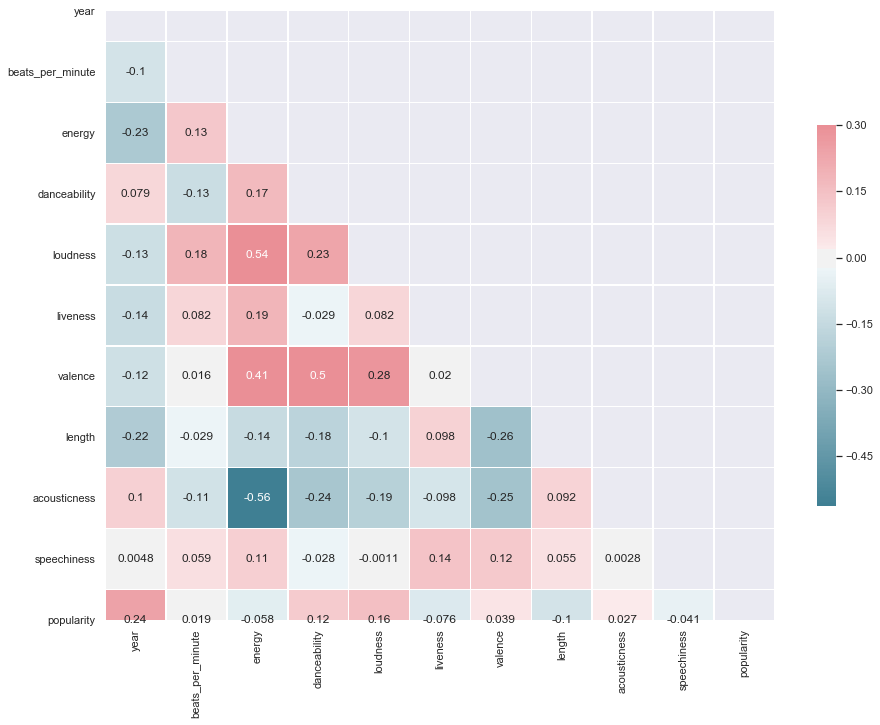

In [37]:
#Now take a look at the correlations. 
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})


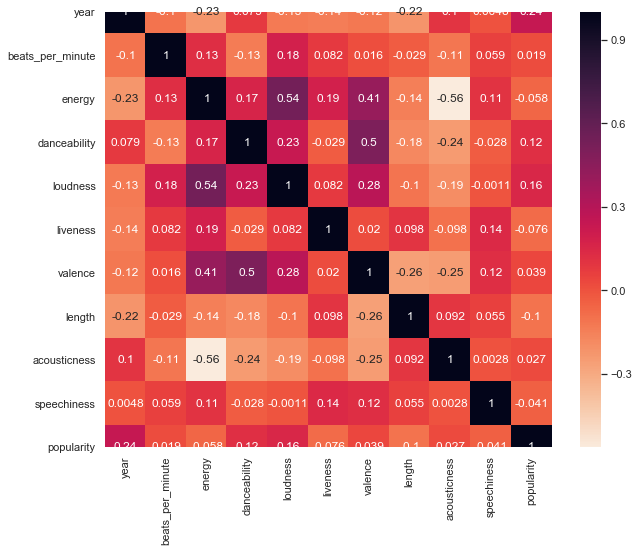

In [38]:
#just another way to look at the same correlations 
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True,cmap = sns.cm.rocket_r)

I want to consider 'loudness' as my target variable.
From the heatmap, it is clear that 'loudness' is highly correlated with 'energy'.

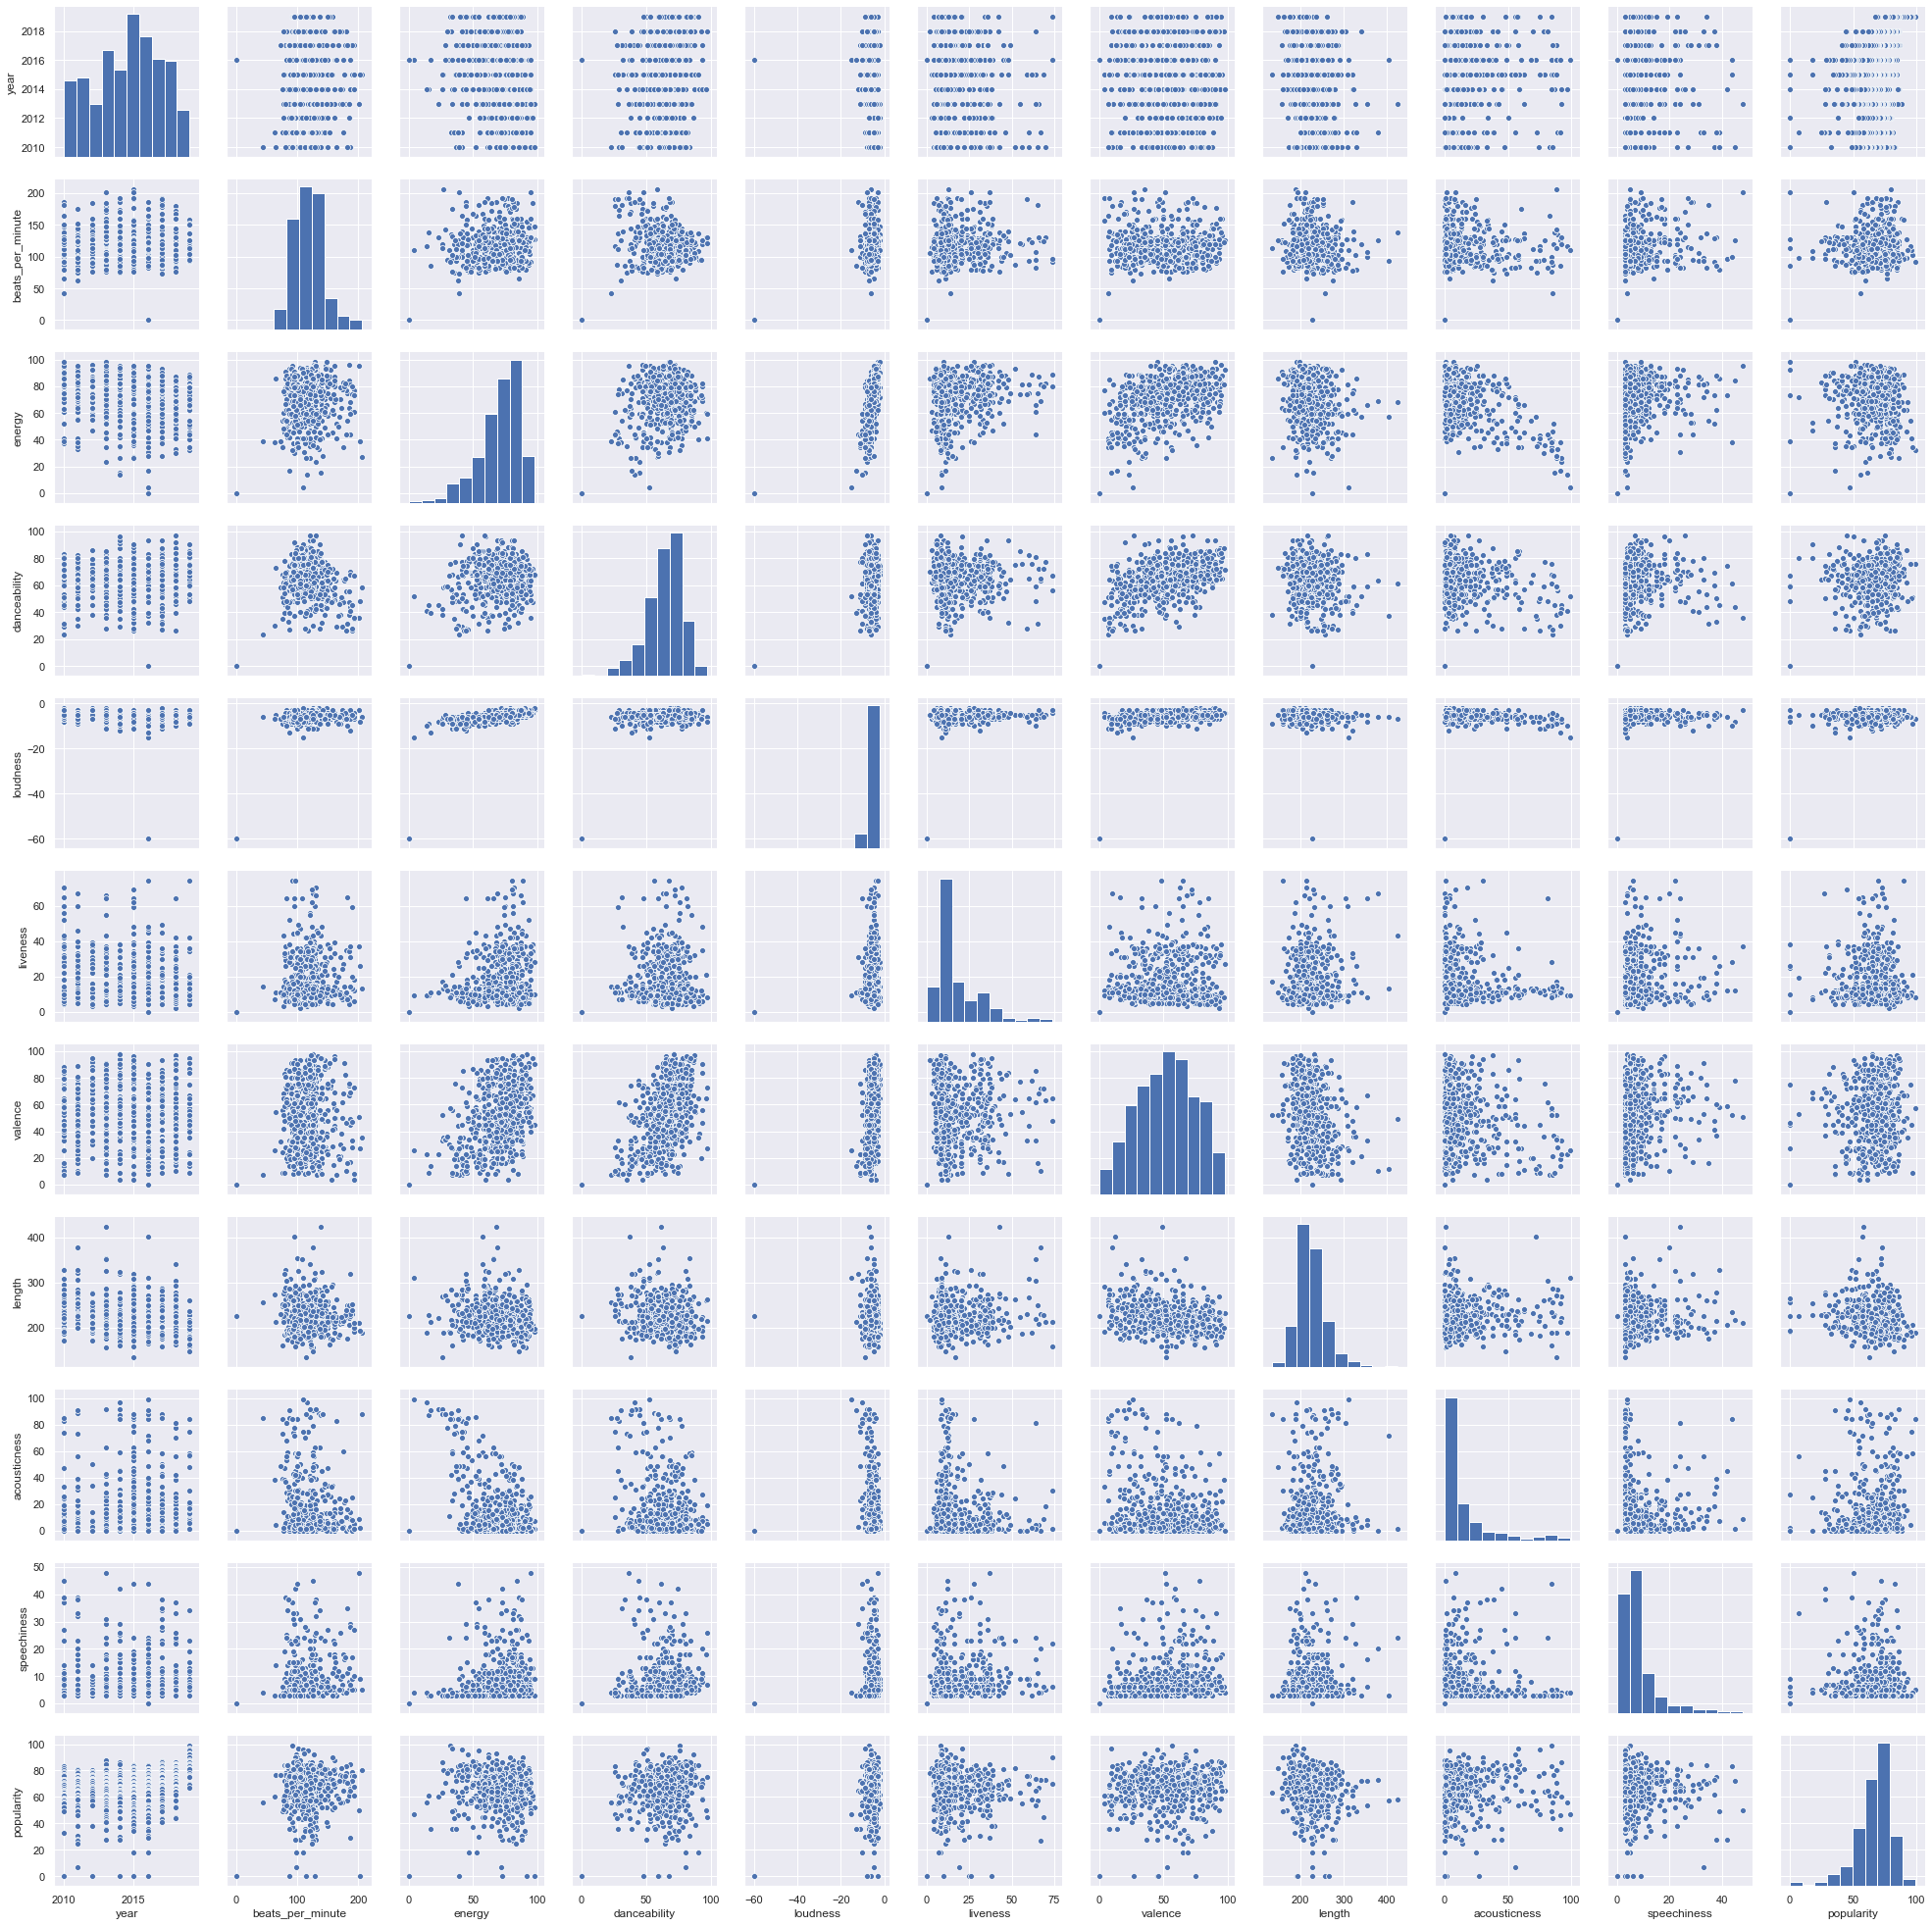

In [39]:
# Let's visualize all the features using pairplot
sns.pairplot(data = df)

Insights: we can see from this pairplot, there is no apparently linear relationships between features. 

ON TO PART2: MACHINE LEARNING 

Want to predict whether a song is a dance pop or not a dance pop genre? 

In [40]:
df['genre'].value_counts().head(10)

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
Name: genre, dtype: int64

There are 327 songs are dance pop, the rest of them are not ! 

In [41]:
#counts for each genre 
df['genre'].value_counts().head(10)

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
Name: genre, dtype: int64

In [42]:
df['label']= np.where(df['genre'] == 'dance pop', 'Dance Pop','Not Dance Pop' )
df['label'].value_counts()

Dance Pop        327
Not Dance Pop    276
Name: label, dtype: int64

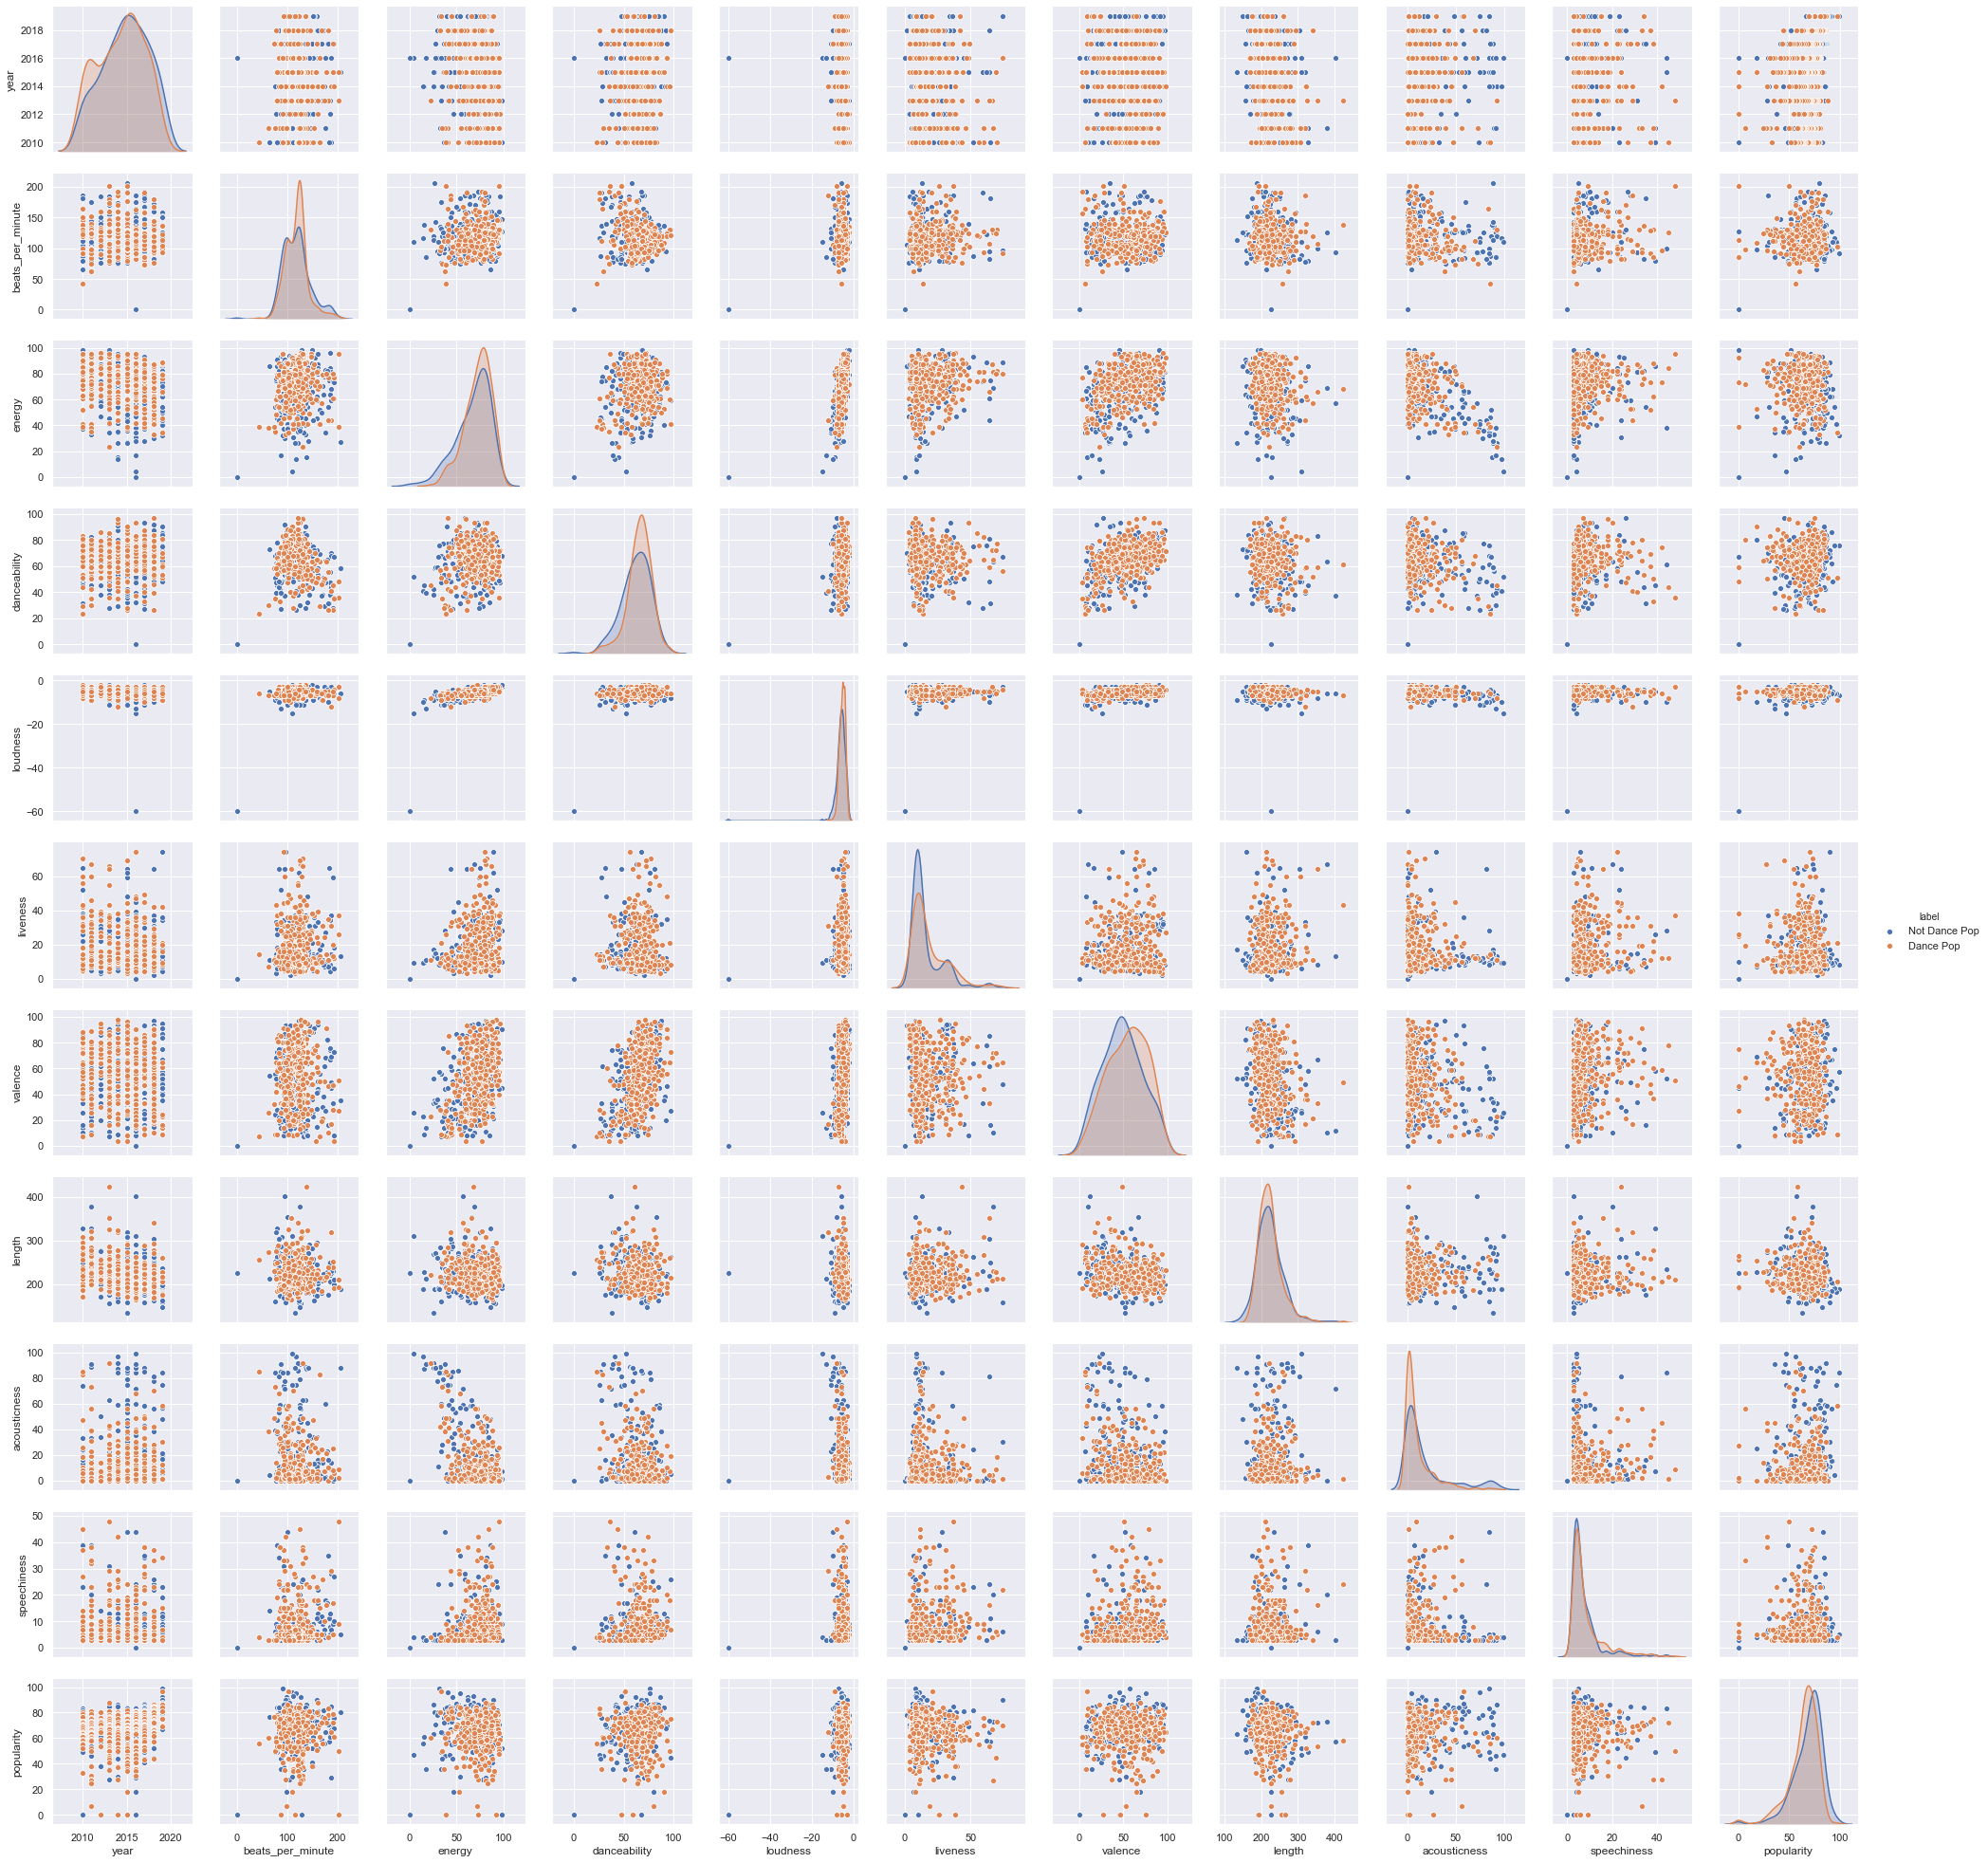

In [43]:
sns.pairplot(df, hue = 'label')

In [44]:
#Feature selection and defining input and output variables 
selected_features = ['beats_per_minute', 'energy', 'danceability', 'loudness', 'liveness', 'valence', 'length', 'acousticness']

X = df[selected_features]

y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 4)

print('Length of the training data: ', X_train.shape, '\nLength of the testing data: ', y_test.shape)

Length of the training data:  (482, 8) 
Length of the testing data:  (121,)


In [45]:
#Initialize an empty random forest model

model = RandomForestClassifier(random_state = 20)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=20)

In [46]:
# Initialize an empty Random Forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=20)
model.fit(X_train, y_train)
# Now lets evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred, pos_label = 'Dance Pop')

recall = recall_score(y_true=y_test, y_pred=y_pred, pos_label = 'Dance Pop')
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred, pos_label = 'Dance Pop')
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.595041
Recall Score: 0.634921
F1 Score: 0.620155
AUC Score: 0.644362


In [47]:
params = {
    'n_estimators' : [5, 10, 50, 100, 300],
    'criterion' : ['gini', 'entropy'],
    'max_depth': [5, 10, 100], 
    'min_samples_split': [2, 10, 100, 500],
    'max_features': [2, 4, 'auto']
}

grid_search_cv = GridSearchCV( 
    estimator=RandomForestClassifier(random_state=20), 
    param_grid=params,
    scoring='roc_auc')


# Now, with one easy command, fit all combination of trees. 
grid_search_cv.fit(X_train, y_train)


# Print the best parameters it found
print(grid_search_cv.best_params_)


# This command gives you model that has the highest roc_auc-score. 
model = grid_search_cv.best_estimator_

{'criterion': 'gini', 'max_depth': 100, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [48]:
# Now lets evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred, pos_label = 'Dance Pop')
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred, pos_label = 'Dance Pop')
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred, pos_label = 'Dance Pop')
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.595041
Precision Score: 0.606061
Recall Score: 0.634921
F1 Score: 0.620155
AUC Score: 0.644362


In [49]:
# Now lets look at our feature importances
feature_imp = pd.Series(model.feature_importances_,index=selected_features).sort_values(ascending=False)
feature_imp

beats_per_minute    0.140469
length              0.133495
energy              0.132325
valence             0.130232
danceability        0.127874
liveness            0.127207
acousticness        0.124852
loudness            0.083545
dtype: float64